In [1]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import os

def crop_to_square(img):
    width, height = img.size
    size = min(width, height)
    left = (width - size) // 2
    top = (height - size) // 2
    right = left + size
    bottom = top + size
    return img.crop((left, top, right, bottom))

def crop_to_face(img, crop=60):
    width, _ = img.size
    size = width - crop
    left = (width - size) // 2
    top = (width - size + 40) // 2
    right = left + size
    bottom = top + size 
    return img.crop((left, top, right, bottom))

def process_image(input_image_path, output_LR_path, output_HR_path=None, processed_size=(32, 32)):
    # Open the input image
    original_img = Image.open(input_image_path)
    
    # Get the original image dimensions
    original_width, original_height = original_img.size

    # Crop the image to a square
    cropped_img = crop_to_square(original_img)

    # Crop the image to center it further
    if min(original_width, original_height) > 32:
        cropped_img = crop_to_face(cropped_img, crop=100)
    
    # Define the downsampling transformation
    downsample_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize(processed_size, interpolation=transforms.InterpolationMode.BILINEAR),
        transforms.ToPILImage()
    ])
    
    # Define the upsampling transformation
    upsample_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize(processed_size, interpolation=transforms.InterpolationMode.BILINEAR),
        transforms.ToPILImage()
    ])
    
    # Apply transformations
    if (original_width < 32) or (original_height < 32):
        processed_img = upsample_transform(cropped_img)
    elif (original_width > 32) or (original_height > 32):
        processed_img = downsample_transform(cropped_img)
    else:
        processed_img = cropped_img
    
    # Save processed image (and optionally cropped image)
    processed_img.save(output_LR_path)
    if output_HR_path is not None:
        cropped_img.save(output_HR_path)

    return original_img, cropped_img, processed_img



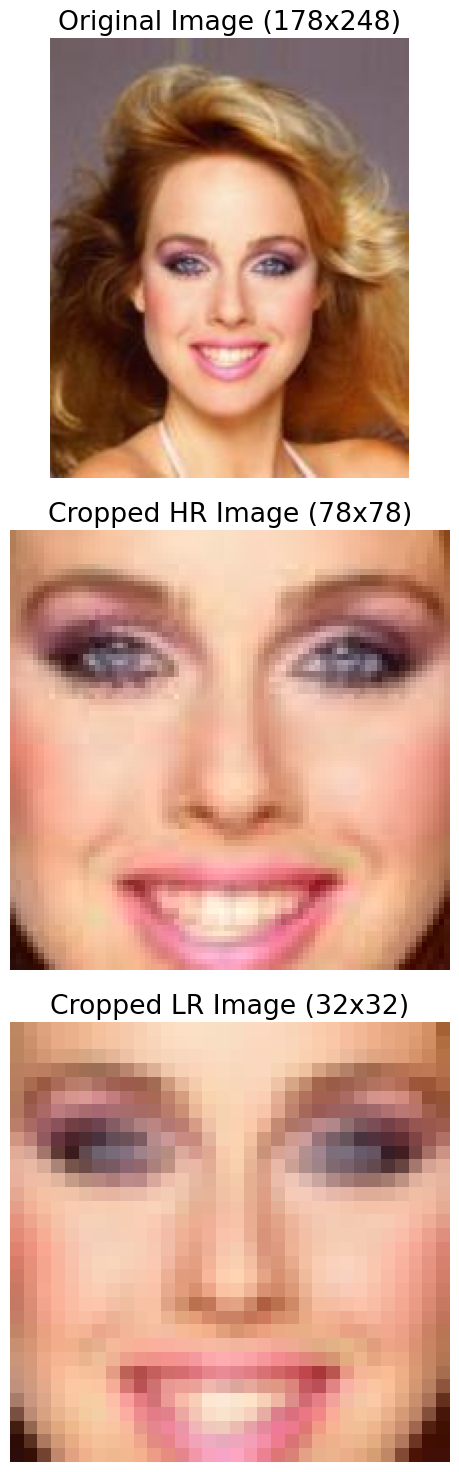

In [3]:
# Example HR_cropped and LR_cropped CelebA
n = 1010
input_image_path = f'/projectnb/ec523kb/projects/teams_Fall_2024/Team_1/celebA/img_align_celeba/{n:06d}.jpg'
output_HR_path = f'/projectnb/ec523kb/projects/teams_Fall_2024/Team_1/datasets_processed/CelebA_processed/HR_cropped/{n:06d}.jpg'
output_LR_path = f'/projectnb/ec523kb/projects/teams_Fall_2024/Team_1/datasets_processed/CelebA_processed/LR_cropped/{n:06d}.jpg'
original_img, cropped_img, processed_img = process_image(input_image_path, output_LR_path, output_HR_path=output_HR_path)

# Visualization
plt.rcParams['font.size'] = 16

fig, axs = plt.subplots(3, 1, figsize=(5, 15))
axs[0].imshow(original_img)
axs[0].set_title('Original Image (178x248)')
axs[0].axis('off')

axs[1].imshow(cropped_img)
axs[1].set_title('Cropped HR Image (78x78)')
axs[1].axis('off')

axs[2].imshow(processed_img)
axs[2].set_title('Cropped LR Image (32x32)')
axs[2].axis('off')

plt.tight_layout()
plt.show()
fig.savefig('/projectnb/ec523kb/projects/teams_Fall_2024/Team_1/datasets_processed/example_celebA.png')

In [80]:
# Generating HR_cropped and LR_cropped CelebA datasets
for n in range(1,5001):
    input_image_path = f'/projectnb/ec523kb/projects/teams_Fall_2024/Team_1/celebA/img_align_celeba/{n:06d}.jpg'
    output_HR_path = f'/projectnb/ec523kb/projects/teams_Fall_2024/Team_1/datasets_processed/CelebA_processed/HR_cropped/{n:06d}.jpg'
    output_LR_path = f'/projectnb/ec523kb/projects/teams_Fall_2024/Team_1/datasets_processed/CelebA_processed/LR_cropped/{n:06d}.jpg'
    process_image(input_image_path, output_LR_path, output_HR_path=output_HR_path)

In [ ]:
# Generating Tinyface dataset
list_img = os.listdir('/projectnb/ec523kb/projects/teams_Fall_2024/Team_1/pytorch-CycleGAN-and-pix2pix/datasets/tinyface/trainB/')
for n in range(1,5001):
    x = list_img[n-1]
    input_image_path = f'/projectnb/ec523kb/projects/teams_Fall_2024/Team_1/pytorch-CycleGAN-and-pix2pix/datasets/tinyface/trainB/{x}'
    output_image_path = f'/projectnb/ec523kb/projects/teams_Fall_2024/Team_1/datasets_processed/Tinyface_processed/{x}'
    process_image(input_image_path, output_image_path)